### Necessary libraries

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix,
from sklearn.linear_model import LogisticRegression
import pandas as pd

### Preparing for classification

Loading the previously saved matrix containing feature vectors and data file

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [120]:
features = np.load('/content/drive/MyDrive/SpeakerRecognition/features.npy', allow_pickle=True)
data = pd.read_csv('/content/drive/MyDrive/SpeakerRecognition/data.csv', sep=',') 

Combine features into one vector for each recording

In [122]:
all_features = []

for i in range(0, len(features)):
    all_features.append(np.concatenate((features[i][0], features[i][1], features[i][2],  features[i][3], features[i][4], features[i][5]), axis=0))

Setting the labels

In [123]:
labels = data['label']
np.unique(labels, return_counts=True)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33]),
 array([14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14,
        14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14]))

In [124]:
X = np.array(all_features)
y = np.array(labels)

### Dataset division

For the needs of the learning process with the use of the logistic regression, the set was divided into training (80%) and test (20%). 

In [125]:
X_train, X_test, y_train, y_test  = train_test_split(X, y, test_size=0.2, random_state=70)

## Classification using Logistic Regression

In [ ]:
lr = LogisticRegression(tol=0.001, max_iter=10000)
lr.fit(X_train, y_train)
y_test_pred = lr.predict(X_test)

### Results

In [10]:
cm = confusion_matrix(y_test, y_test_pred)
print(cm)

[[3 0 0 ... 0 0 0]
 [0 3 0 ... 0 0 0]
 [0 0 3 ... 0 0 0]
 ...
 [0 0 0 ... 5 0 0]
 [0 0 0 ... 0 3 0]
 [0 0 0 ... 0 0 5]]


Text(0.5, 69.0, 'Predicted label')

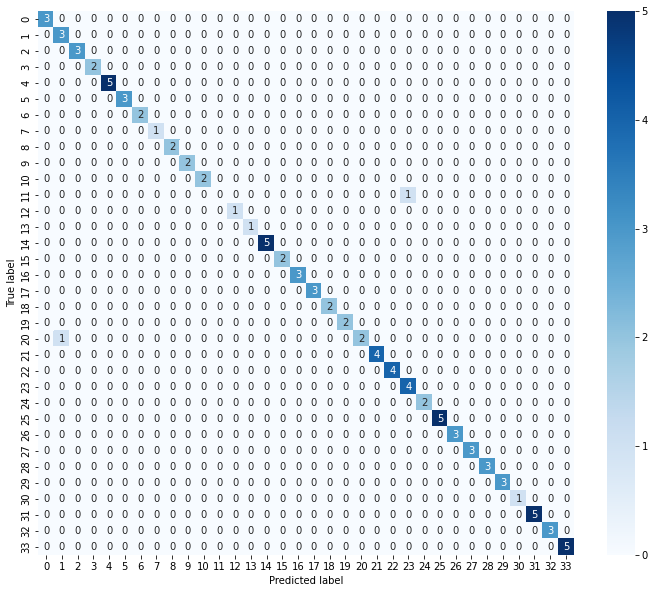

In [ ]:
df_cm = pd.DataFrame(cm)
plt.figure(figsize=(12,10))
sns.heatmap(df_cm, annot=True, cmap = 'Blues')
plt.ylabel('True label')
plt.xlabel('Predicted label')

In [ ]:
print(classification_report(y_test, y_test_pred)) 

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         3
           1       0.75      1.00      0.86         3
           2       1.00      1.00      1.00         3
           3       1.00      1.00      1.00         2
           4       1.00      1.00      1.00         5
           5       1.00      1.00      1.00         3
           6       1.00      1.00      1.00         2
           7       1.00      1.00      1.00         1
           8       1.00      1.00      1.00         2
           9       1.00      1.00      1.00         2
          10       1.00      1.00      1.00         2
          11       0.00      0.00      0.00         1
          12       1.00      1.00      1.00         1
          13       1.00      1.00      1.00         1
          14       1.00      1.00      1.00         5
          15       1.00      1.00      1.00         2
          16       1.00      1.00      1.00         3
          17       1.00    